# 得られたembeddingを可視化したりする

In [34]:
import json
from pathlib import Path

In [35]:
embedding_dim=8
bow_threshold=10000
json_path= Path(f"../result/embeddings_{bow_threshold}_{embedding_dim}.json")

In [36]:
with json_path.open("r") as f:
    embeddings=json.load(f)

In [37]:
embeddings

{'capo': {'capo0': [-0.17173217236995697,
   -0.28994613885879517,
   0.03371436893939972,
   0.15035808086395264,
   -0.007538539823144674,
   0.2903346121311188,
   -0.1328415423631668,
   -0.26164036989212036],
  'capo1': [0.1708698272705078,
   0.15502940118312836,
   -0.08614228665828705,
   -0.12300711125135422,
   0.18529696762561798,
   -0.2071530520915985,
   -0.021236319094896317,
   0.4008362591266632],
  'capo2': [0.055184729397296906,
   -0.044427741318941116,
   -0.057971011847257614,
   0.06903176009654999,
   -0.017439058050513268,
   0.0023666061460971832,
   -0.040703557431697845,
   0.045127056539058685],
  'capo3': [0.06850621849298477,
   -0.13224828243255615,
   0.19449417293071747,
   -0.014965650625526905,
   -0.06725962460041046,
   0.05700911208987236,
   -0.03453964740037918,
   -0.12694163620471954],
  'capo4': [0.02796442247927189,
   -0.10631749033927917,
   0.13460029661655426,
   0.009514633566141129,
   -0.05003681033849716,
   0.056787267327308655,
   

In [38]:
import numpy as np
from sklearn.decomposition import PCA  
def get_pca_embeddings(embeddings,n_compenents):
    keys=[]
    embeddings_mat=[]
    for kind, em in embeddings.items(): 
        for key, embedding in em.items():
            keys.append(key)
            embeddings_mat.append(embedding)
        
    pca = PCA(n_components=n_compenents)                     # 3次元に圧縮するPCAインスタンスを作成
    X = pca.fit_transform(np.array(embeddings_mat))
    
    result={}
    for i in range(len(keys)):
        result[keys[i]]=X[i]
    return result


In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_embeddings(embeddings,target_chords):
    if len(list(embeddings.values())[0]) != 2:
        raise Exception("Invalid embeddings given.")
    x1=[]
    x2=[]
    for target_chord in target_chords:
        x1.append(embeddings[target_chord][0])
        x2.append(embeddings[target_chord][1])

    for (i,j,k) in zip(x1,x2,target_chords):
            plt.plot(i,j)
            plt.annotate(k, xy=(i, j))
    plt.show()

In [40]:
import numpy as np

def search_similar_embeddings(target, embeddings,top_k=1):
    """検索クエリのtargetとのcos類似度が大きいembeddingを検索対象embeddingsから探して上位k番目まで返す."""
    result={}
    for key, embedding in embeddings.items():
        cos=cos_similarity(embedding,target)
        result[key]=cos
    return sorted(result.items(), key=lambda x:x[1],reverse=True)[:top_k]


def cos_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

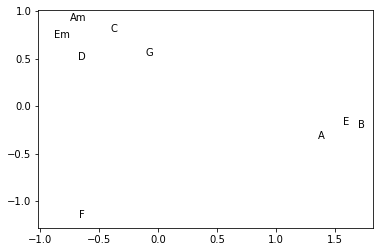

In [59]:
pca_embeddings=get_pca_embeddings(embeddings,2) 
plot_embeddings(pca_embeddings,target_chords=["A","B","C","D","E","F","G","Am","Em"])

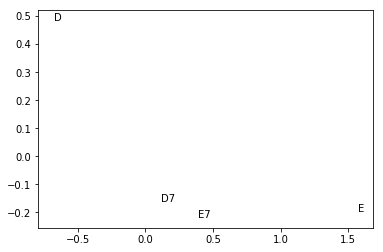

In [71]:
plot_embeddings(pca_embeddings,target_chords=["D","D7","E","E7"])

In [ ]:
np.array(embeddings["chord"]["D7"]) -np.array(embeddings["chord"]["D"])+ np.array(embeddings["chord"]["E"])   

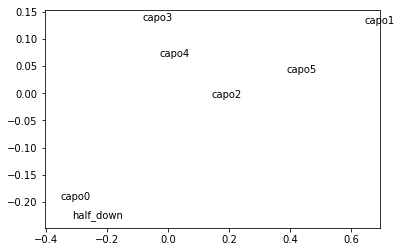

In [42]:
plot_embeddings(pca_embeddings,target_chords=embeddings["capo"].keys())

In [60]:
def get_mean_embeddings(chord_embeddings,chord_list):
    return sum([np.array(chord_embeddings[chord]) for chord in chord_list])/len(chord_list)

In [66]:
gkey_chord=get_mean_embeddings(embeddings["chord"],["C","D","G","Am","Em"])
ekey_chord=get_mean_embeddings(embeddings["chord"],["E","A","B"])

In [65]:
search_similar_embeddings(gkey_chord, embeddings["capo"])

[('capo3', 0.9148627794809049), ('capo4', 0.8794524637758726)]

In [67]:
search_similar_embeddings(ekey_chord, embeddings["capo"])

[('capo1', 0.8161371717679469)]

In [79]:
e7=np.array(embeddings["chord"]["C7"]) -np.array(embeddings["chord"]["C"])+ np.array(embeddings["chord"]["E"])
search_similar_embeddings(e7  , embeddings["chord"],10)

[('E', 0.898935571123925),
 ('B', 0.8634312971836976),
 ('Dm', 0.8483122550985608),
 ('Asus4', 0.8378934594963497),
 ('Cm7', 0.835664139007935),
 ('A', 0.8162676974116992),
 ('C#maj7', 0.7143456388015048),
 ('Gm7', 0.6423920037019785),
 ('G#m', 0.6037394770467525),
 ('G#maj7', 0.5852001749627571)]

In [44]:
search_similar_embeddings(embeddings["capo"]["half_down"], embeddings["chord"],10)

[('C#', 0.9603979514691166),
 ('A#m', 0.9503163495585256),
 ('Gmaj7', 0.9014410415699113),
 ('F#', 0.9008619833935019),
 ('D#m', 0.8906278905526256),
 ('D#', 0.8892660213522627),
 ('Em7', 0.8867859845504494),
 ('G#', 0.8502779074488636),
 ('Fm7', 0.84417139214745),
 ('Dmaj7', 0.8404005437497406)]